# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Надо научиться определять рыночную стоимость объектов недвижимости. Задача проекта — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)        
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


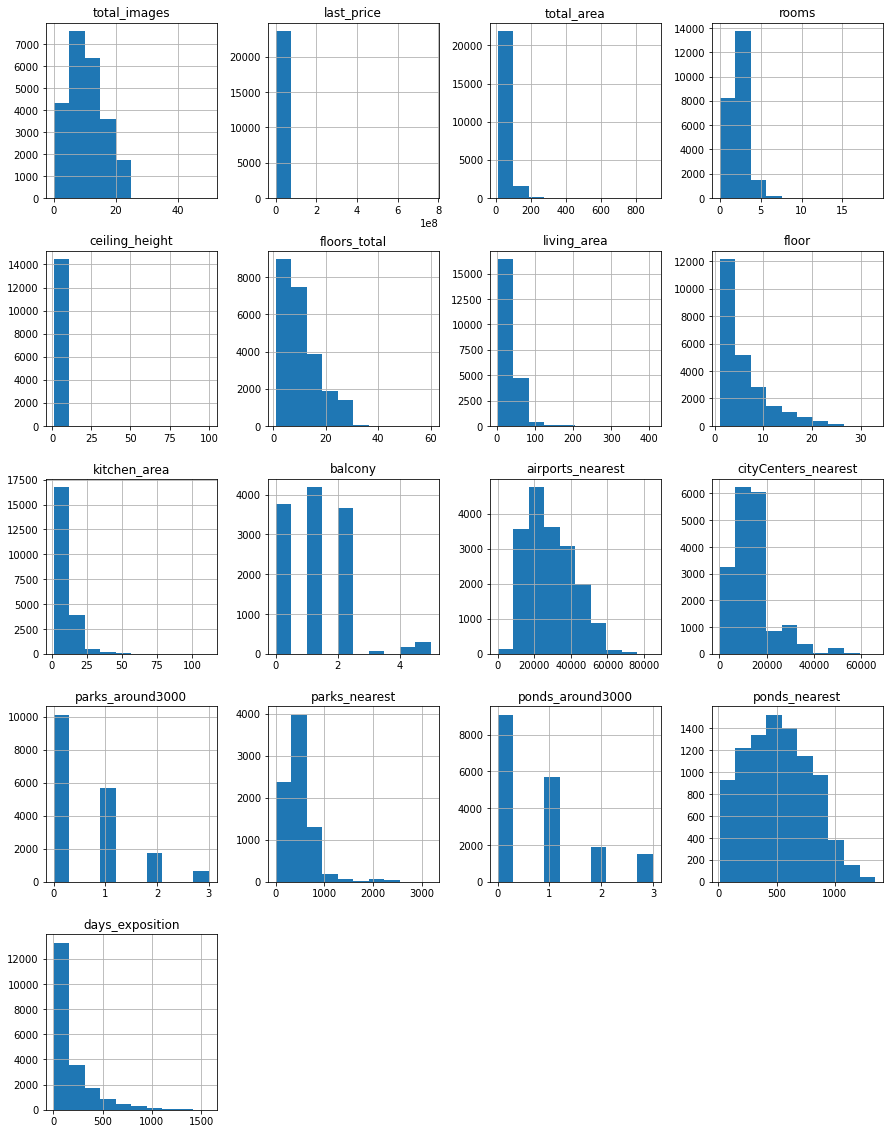

In [5]:
data.hist(figsize=(15, 20));

**Вывод:**

Открыв файл и изучив первую информацию о данных, можно отметить следующее:
- почти две трети столбцов имеют пропуски;
- данные в столбцах **first_day_exposition, is_apartment** имеют не характерный для них тип данных **object**;
- аномальные значения и выбросы присутствуют практически во всех столбцах  

## Предобработка данных

### Работа с пропусками

 Для начала посмотрим общее количество пропусков в файле. Изучим пропущенные данные по каждому столбцу и попробуем их исправить.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

- Пропуски в столбце **ceiling_height** носят случайный характер, возможно эти данные не указали при заполнении анкеты(договора). Их можно заменить медианным значением

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

- Пропуски в столбце **floors_total** также носят случайный характер их лучше удалить, т.к. количество небольшое

In [8]:
data.dropna(subset=['floors_total'], inplace=True)

- Пропуски в столбцах с размером жилой площади либо площади кухни некорректно заменить простым вычитанием из общей площади квартиры, т.к. помимо этого в любой квартире есть еще нежилые помещения (коридоры, туалеты, лоджии и проч.). Более правильно вычислить какой процент в среднем занимает площадь кухни или жилая площадь от общей площади квартиры и потом, на основании этого, вычислить недостающие данные. Для этого создадим переменную **data_area**, которой передадим срез данных со строками, имеющими полные сведения о всех площадях в квартире. Затем вычислим доли кухни и жилых помещений в общей площади квартиры. Потом заполним пропуски в нашем датасете, используя эти данные 

In [9]:
data_area = data[~((data['living_area'].isna()) & (data['kitchen_area'].isna()))]

In [10]:
ratio_living = data_area['living_area'].mean() / data_area['total_area'].mean()

In [11]:
ratio_living

0.5717117627828686

In [12]:
ratio_kitchen = data_area['kitchen_area'].mean() / data_area['total_area'].mean()

In [13]:
ratio_kitchen

0.17525097803768191

In [14]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * ratio_living)

In [15]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * ratio_kitchen)

- Теперь разберемся со столбцом **is_apartment**. В этом столбце содержатся булевые значения и большое количество пропусков *NaN*. Именно поэтому, тип данных в этом столбце отображается как *object*. Логично предположить, что эти пропуски являются отрицанием того, что квартира имеет статус апартаментов, ведь по статистике доля апартаментов на рынке жилья невелика и составляет 1-2%. Поэтому, скорее всего, продавцы пропускали этот пункт при заполнении данных о квартире. Тогда можно заменить пропуски в этом столбце на *False*, тип данных, в следствии этого, также изменится.

In [16]:
data['is_apartment'] = data['is_apartment'].fillna(False)

- Такая же логика применима к пропускам в столбце, содержащим данные о количестве балконов. Вероятнее всего, люди оставляли пустым значение при отсутствии балконов в квартире. Заменим пропуски числом **0**

In [17]:
data['balcony'] = data['balcony'].fillna(0)

- Пропуски в столбце **locality_name** мы не сможем заполнить адекватными данными, т.к. датасет не содержит никаких дополнительных сведений о местоположении квартиры (например, координаты местности, почтовый индекс). Поэтому, строки с пропущенными данными удалим. Их количество невелико и существенного влияния на дальнейший анализ они не окажут.

In [18]:
data.dropna(subset=['locality_name'], inplace=True)

 - Что касается пропусков в столбцах **airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest**, то их мы не сможем заполнить по тем же причинам, что и в случае с названием населенного пункта (нет доп сведений о местоположении квартиры). Но удалять эти строки нельзя, потому что их количество существенно и может повлиять на результаты анализа. Поэтому, поставим заглушки и будем учитывать это в дальнейшем исследовании.

In [19]:
data['airports_nearest'] = data['airports_nearest'].fillna(-1)

In [20]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)

In [21]:
data['parks_nearest'] = data['parks_nearest'].fillna(-1)

In [22]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)

Проверим нет ли таких ситуаций, когда в объявлении заполнены картографические данные, но при этом есть пропуски в столбцах **parks_around3000 и ponds_around3000**. В этом случае, мы могли бы эти пропуски заполнить на основании картографических данных.

In [23]:
data[(data['parks_around3000'].isna()) & (data['parks_nearest'] != -1)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [24]:
data[(data['ponds_around3000'].isna()) & (data['ponds_nearest'] != -1)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Таких объявлений не обнаружено, тогда также поставим заглушки в этих столбцах

In [25]:
data['parks_around3000'] = data['parks_around3000'].fillna(-1)

In [26]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(-1)

- Пропуски в **days_exposition** могут означать, что продавец забыл снять объявление с продажи, либо объявление еще не снято и квартира находится в продаже. Заполнять такие пропуски и удалять строки с ними не нужно, это повлияет на результаты анализа, поэтому тоже сделаем заглушки

In [27]:
data['days_exposition'] = data['days_exposition'].fillna(-1)

In [28]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

### Изменение типов данных

- Теперь изменим тип данных в столбце **first_day_exposition**. Дату можно ограничить числом, месяцем и годом, т.к. точное время не имеет значения. 

In [29]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

- Заменим на целые числа типа *int* данные в столбцах **last_price, floors_total, days_exposition
и  balcony**. В этих данных не может быть дробной части, поэтому такая замена будет уместна

In [30]:
data = data.astype({ 
    'last_price': 'int',
    'floors_total': 'int',
    'days_exposition': 'int',
    'balcony': 'int'
})


In [31]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                  int64
dtype: object

### Поиск дубликатов

- Проверим наличие явных и неявных дубликатов в названиях населенных пунктов.

In [32]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

- Видно, что слово "поселок" пишут либо с буквой "е", либо с буквой "ё". Из-за этого могут возникать дубликаты в названиях. Еще одной причиной появления дубликатов может быть использование синонимов таких как "поселок", "поселок городского типа", "городской поселок". Сделаем соответствующие изменения в названиях и сравним результаты до и после этих изменений. Если количество уникальных значений изменится, значит решение было правильным.

In [33]:
data['locality_name'].nunique()

364

In [34]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [35]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')

In [36]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')

In [37]:
data['locality_name'].nunique()

322

In [38]:
data.duplicated().sum()

0

### Устранение редких и аномальных значений

- Выведем еще раз статистические данные и гистограммы по столбцам

In [39]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.594974,5.878124,10.500839,0.593677,22046.367282,10879.297178,0.235434,166.510757,0.356503,198.121579,156.285551
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,22.376098,4.871485,6.038474,0.960660,16462.449755,9639.609656,0.978721,306.661592,1.111620,305.597148,213.616127
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,10143.000000,2186.000000,0.000000,-1.000000,0.000000,-1.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,21854.000000,11246.000000,0.000000,-1.000000,0.000000,-1.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,34324.000000,15237.000000,1.000000,301.000000,1.000000,389.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


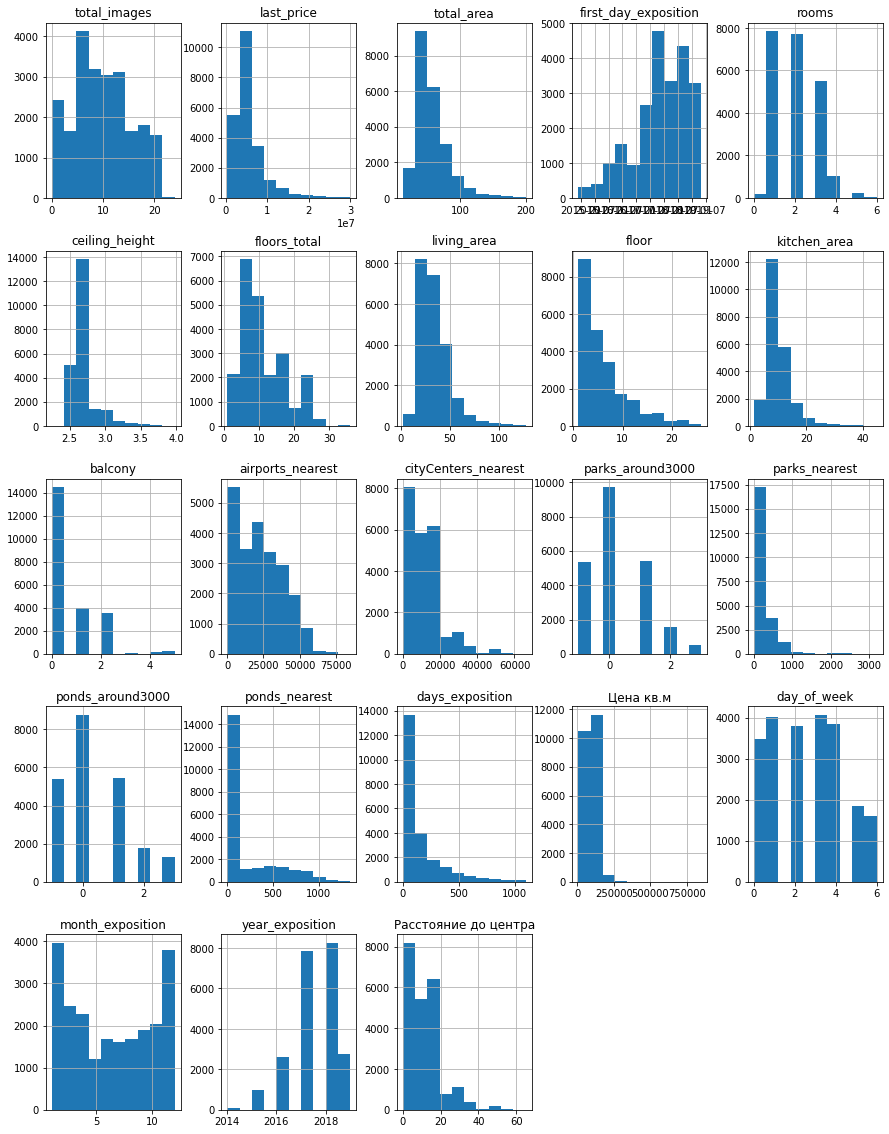

In [108]:
data.hist(figsize=(15, 20));

- Изучим первый столбец с количеством фотографий. Глядя на изначальную гистограмму, можно понять, что основная масса значений находится в диапазоне от 0 до 25 изображений, также есть аномально высокие значения - до 50 фото на одну квартиру. Убедимся, что количество таких аномалий невелико, и удалим их, т.к.это не нанесет ущерба нашему исследованию. После удаления аномальных значений построим обновленную гистограмму 

In [41]:
data.loc[data['total_images'] > 25, 'total_images'].count()

30

In [42]:
data = data[data['total_images'] <= 25]

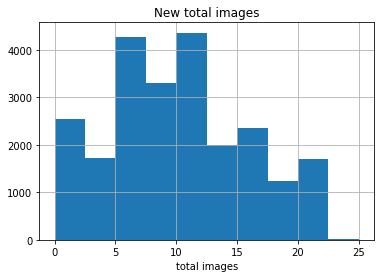

In [43]:
data['total_images'].hist()
plt.title('New total images')
plt.xlabel('total images')
plt.show()

- В столбце **last_price** также присутствуют аномальные значения. Это хорошо видно на гистограмме и в таблице с основными статистическими показателями. Чтобы понять где ставить границы отсечения выбросов, отсортируем значения

In [44]:
data['last_price'].sort_values() 

8793         12190
14911       430000
17456       430000
16274       440000
9581        450000
           ...    
15651    300000000
1436     330000000
14706    401300000
19540    420000000
12971    763000000
Name: last_price, Length: 23535, dtype: int64

Мы можем ограничить нижнюю цену на уровне 4000000, а верхнюю - на уровне 300000000. В этом случае, мы отбросим небольшое количество строк, но распределение станем намного лучше

In [45]:
data = data[(data['last_price'] < 30000000) & (data['last_price'] > 400000)]

- В столбце **total_area** основная масса значений находится до 200 м2. Найдем количество квартир с большей площадью и, если их количество невелико, то удалим их из датасета. 

In [46]:
data.loc[data['total_area'] > 200, 'total_area'].count()

92

In [47]:
data = data[data['total_area'] <= 200]

Проверим, на всякий случай, нет ли в датасете квартир, где общая площадь меньше, чем жилая и кухня вместе взятые

In [48]:
data.loc[data['total_area'] < (data['living_area'] + data['kitchen_area']), 'total_area'].count()

116

Такие варианты есть, их лучше удалить

In [49]:
data= data[data['total_area'] > (data['living_area'] + data['kitchen_area'])]

- В столбце **rooms** удалим строки с количеством комнат больше 6-ти. 

In [50]:
data.loc[data['rooms'] > 6, 'rooms'].count()

22

In [51]:
data = data[data['rooms'] <= 6]

- Исследуем значения в столбце **ceiling_height**. Для этого выведем список уникальных значений

In [52]:
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.61,  3.2 ,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.3 ,  2.71,  4.  ,  2.47,  2.73,
        2.84,  3.1 ,  2.34,  3.4 ,  3.5 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76, 25.  ,  2.58,  3.7 ,  2.52,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.  ,  2.79,  2.95,
        4.06,  2.94,  3.54,  3.53,  2.83,  2.4 ,  3.38,  3.01,  3.65,
        3.18,  3.35,  2.3 ,  2.48,  2.62,  3.57,  2.82,  3.98,  2.63,
        3.83,  3.52,  3.75,  2.88,  3.67,  3.66,  4.19,  3.95,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36, 32.  ,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.16,  3.26,  3.34,  2.81,  3.44,  2.97,  4.37,  3.9 ,
        3.22,  3.27, 27.  ,  4.1 ,  2.68,  2.93,  3.46, 24.  ,  3.47,
        3.33,  3.63,  3.14,  3.32, 26.  ,  1.2 ,  8.3 ,  2.86,  3.08,
        3.17,  3.28,

В столбце есть ряд значений, в которых, очевидно, нарушена разрядность. Например, 32, 26 и проч. Такие ошибки часто случаются при вводе данных. Поменяем в них разрядность

In [53]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] /= 10

Теперь найдем аномальные значения и выбросы. Для этого построим диаграмму размаха

<AxesSubplot:>

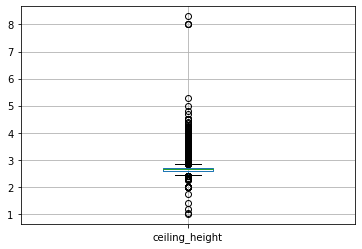

In [54]:
data.boxplot(column='ceiling_height')

Из диаграммы видно, что если ограничить нижний порог высоты потолков на уровне 2м, а верхний - на уровне 4м, то распределение станет намного лучше. Посмотрим сколько строк потребуется удалить

In [55]:
data.query('ceiling_height < 2 | ceiling_height > 4').ceiling_height.count()

38

Количество небольшое, на результаты анализа сильно не повлияет. Удалим эти строки

In [56]:
data = data[(data['ceiling_height'] > 2) & (data['ceiling_height'] < 4)]

- В столбце **floors_total** есть аномальные значения на верхних границах, это видно на изначальной гистограмме, а также из таблицы со статистическими данными. Посмотрим сколько аномалий и не забудем, что у нас стоят заглушки на месте пропусков

In [57]:
data['floors_total'].value_counts()

5     5620
9     3710
16    1345
12    1336
10    1161
4     1129
25    1052
17     818
6      817
3      630
14     542
7      529
18     492
24     455
2      361
15     360
23     343
19     334
8      328
22     280
20     262
13     223
11     192
27     162
21     156
26     122
1       24
35      23
28      21
36       3
34       1
60       1
52       1
29       1
33       1
Name: floors_total, dtype: int64

Посмотрим на строки с количеством этажей 52 и 60

In [58]:
data.query('floors_total >50')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,False,False,False,7.4,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166
16731,9,3978000,40.0,2018-09-24,1,2.65,52,10.5,18,False,False,False,14.0,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,-1.0,45


Похоже, что вместо продавец ошибся при вводе значений, вместо 60 нужно поставить 6. А вот про 52 этажа идей нет, лучше эту строку удалить

In [59]:
data['floors_total'] = data['floors_total'].replace(60, 6)

In [60]:
data = data[data['floors_total'] != 52]

Проверим, также, нет ли в датасете квартир, где общее количество этажей меньше, чем этаж квартиры

In [61]:
data[data['floors_total'] < data['floor']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


- Посмотрим на выбросы в столбце **living_area** с помощью диаграммы размаха и определим зону отсечения выбросов

<AxesSubplot:>

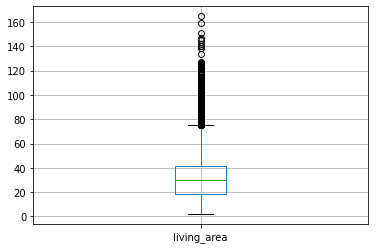

In [62]:
data.boxplot(column='living_area')

Изучим строки, в которых жилая площадь больше 130 кв.м. Если их количество будет не существенно для нашего исследования, то удалим их

In [63]:
data.query('living_area > 130')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3725,16,28000000,188.0,2015-06-09,5,3.40,6,139.0,5,False,False,False,32.947184,0,Санкт-Петербург,25069.0,3771.0,1.0,135.0,1.0,618.0,1395
4439,6,16490000,183.7,2018-03-26,6,3.22,5,133.4,2,False,False,False,19.100000,0,Санкт-Петербург,24823.0,5042.0,1.0,711.0,0.0,-1.0,43
4710,0,18000000,184.0,2016-02-26,5,2.65,7,142.0,5,False,False,False,15.000000,0,Санкт-Петербург,22656.0,4288.0,1.0,556.0,0.0,-1.0,175
9392,3,19500000,195.7,2018-02-22,6,3.21,5,150.8,5,False,False,False,17.700000,0,Санкт-Петербург,23932.0,4195.0,1.0,500.0,0.0,-1.0,125
11800,1,20295200,192.3,2018-02-13,6,2.95,2,147.2,1,False,False,False,17.800000,0,деревня Бор,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,162
12549,10,14500000,165.0,2017-02-02,6,2.65,6,140.0,4,False,False,False,19.000000,0,Санкт-Петербург,20561.0,1827.0,3.0,427.0,3.0,251.0,180
12567,19,22000000,180.6,2015-03-25,5,2.80,7,140.0,2,False,False,False,30.000000,0,Санкт-Петербург,24324.0,5038.0,0.0,-1.0,0.0,-1.0,-1
13729,14,20300000,170.0,2017-11-26,3,3.40,6,140.0,4,False,False,False,25.000000,1,Санкт-Петербург,26273.0,4975.0,3.0,388.0,1.0,189.0,104
16199,7,19000000,189.0,2017-05-09,6,3.23,6,145.0,2,False,False,False,33.122435,0,Санкт-Петербург,24187.0,2980.0,2.0,73.0,3.0,134.0,480
18790,0,15000000,197.2,2016-01-13,5,3.78,5,145.4,3,False,False,False,17.500000,0,Санкт-Петербург,24089.0,4154.0,1.0,634.0,2.0,516.0,389


In [64]:
data = data[data['living_area'] < 130]

- Гистограмму столбца **floor** можно немного улучшить, отбросив значения выше 27 этажа

In [65]:
data[data['floor'] > 27].floor.count()

6

In [66]:
data = data[data['floor'] < 27]

- В данных о площади кухни можно отсечь аномальные строки с размерами выше 45 кв.м. 

In [67]:
data[data['kitchen_area'] > 45].kitchen_area.count()

26

In [68]:
data = data[data['kitchen_area'] < 45]

- Изучим более детально данные в столбце **airports_nearest**. Здесь есть одно нулевое значение, которое вызывает сомнения. Скорее всего произошел какой-то сбой при заполнении или есть ошибка в картографических данных. Лучше удалить эту строку.

In [69]:
data.query('airports_nearest != -1').sort_values(by='airports_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000,34.7,2018-09-23,1,2.70,9,19.8,3,False,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,-1.0,0.0,-1.0,60
12899,8,4199000,56.0,2017-12-21,2,2.65,9,27.0,5,False,False,False,15.0,0,Санкт-Петербург,6450.0,17461.0,0.0,-1.0,1.0,444.0,24
4017,7,2268000,35.0,2017-12-21,1,2.65,9,14.0,6,False,False,False,8.0,0,Санкт-Петербург,6450.0,17461.0,0.0,-1.0,1.0,444.0,25
7778,9,2750000,29.0,2017-02-19,1,2.50,4,15.0,1,False,False,False,6.0,0,Санкт-Петербург,6914.0,21486.0,1.0,215.0,0.0,-1.0,43
23150,3,6490000,62.5,2015-03-18,2,2.65,24,33.5,15,False,False,False,9.0,4,Санкт-Петербург,6949.0,13165.0,1.0,711.0,0.0,-1.0,917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,15,3650000,53.8,2018-09-24,3,2.50,4,36.9,3,False,False,False,5.2,0,поселок Молодежное,83758.0,64857.0,0.0,-1.0,0.0,-1.0,121
20746,1,3300000,43.5,2016-02-16,2,2.55,4,27.2,2,False,False,False,5.0,1,поселок Молодежное,84006.0,65105.0,0.0,-1.0,0.0,-1.0,1043
577,7,4000000,59.0,2017-07-23,3,2.50,5,37.0,1,False,False,False,7.0,0,поселок Молодежное,84665.0,65764.0,0.0,-1.0,0.0,-1.0,-1
5340,19,3600000,50.6,2019-03-19,2,2.50,5,29.9,4,False,False,False,7.0,1,поселок Молодежное,84853.0,65952.0,0.0,-1.0,0.0,-1.0,-1


In [70]:
data = data[data['airports_nearest'] != 0]

- В столбце **days_exposition** есть значения, которые превышают 3 года, их не так много. Можем удалить соответствующие строки, чтобы аномалий стало меньше

In [71]:
data[data['days_exposition'] > 1100].days_exposition.count()

149

In [72]:
data = data[data['days_exposition'] < 1100]

- Данные в столбцах **balcony, parks_around3000, ponds_around3000** можем оставить без дальнейших изменений

- Посмотрим как изменился размер датасета после всех изменений, проведенных в процессе предобработки данных

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22622 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22622 non-null  int64         
 1   last_price            22622 non-null  int64         
 2   total_area            22622 non-null  float64       
 3   first_day_exposition  22622 non-null  datetime64[ns]
 4   rooms                 22622 non-null  int64         
 5   ceiling_height        22622 non-null  float64       
 6   floors_total          22622 non-null  int64         
 7   living_area           22622 non-null  float64       
 8   floor                 22622 non-null  int64         
 9   is_apartment          22622 non-null  bool          
 10  studio                22622 non-null  bool          
 11  open_plan             22622 non-null  bool          
 12  kitchen_area          22622 non-null  float64       
 13  balcony         

**Вывод:**

В процессе предобработки данных было обнаружено большое количество пропущенных значений. Среди них были случайные пропуски, которые были допущены, скорее всего, при заполнении продавцами. Они были в столбцах **ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, parks_around3000, ponds_around3000**. Другая часть пропусков, которые были в столбцах с картографическими данными, носила, скорее всего, технический характер, т.к. они вносились автоматически.

В результате все пропуски были устранены, некотрые путем заменены на медианные или средние значения, другие просто были удалены, а в некоторых категориях, в основном в картографических данных проставлены заглушки. Помимо этого, были выявлены и устранены неявные дубликаты в наименованиях населенных пунктов. Также была проведена работа по удалению выбросов и аномальных значений.

После удаления дубликатов датасет стал меньше на 42 строки и еще на 1035 строк после очистки от пропусков и аномалий. В итоге датасет уменьшился чуть более, чем на 4%, что не отразится критически на результатах дальнейшего исследования.

## Посчитайте и добавьте в таблицу новые столбцы

- Добавим в таблицу столбец со стоимостью 1 кв.м. И приведем его в целочисленный вид

In [74]:
data['meter_price'] = data['last_price'] / data['total_area']
data['meter_price'] = data['meter_price'].astype(int)

- Добавим в таблицу столбец с днем недели публикации объявления

In [75]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday

- Добавим в таблицу столбец с месяцем публикации объявления

In [76]:
data['month_exposition'] = data['first_day_exposition'].dt.month

- Добавим в таблицу столбец с годом публикации объявления

In [77]:
data['year_exposition'] = data['first_day_exposition'].dt.year

- Определим тип этажа квартиры ("первый", "последний", "другой") и добавим в таблицу столбец с типами этажа

In [78]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

- Добавим в таблицу столбец с растоянием до центра города в км

In [79]:
data['distance_to_center'] = data['cityCenters_nearest'] / 1000
data['distance_to_center'] = data['distance_to_center'].astype(int)

- Убедимся, что все столбцы добавлены

In [80]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,day_of_week,month_exposition,year_exposition,floor_type,distance_to_center
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1,120370,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81,82920,1,12,2018,первый,18
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785,3,8,2015,другой,13
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000,1,6,2018,другой,8
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.400000,5,False,False,False,9.10,0,поселок Янино-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,55,95065,0,9,2018,другой,0
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.600000,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,-1.0,0.0,-1.0,155,99195,3,11,2017,другой,19
7,5,7915000,71.60,2019-04-18,2,2.65,24,40.934562,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,-1.0,0.0,-1.0,-1,110544,3,4,2019,другой,11
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.430000,26,False,False,False,8.81,0,поселок Мурино,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,189,87454,2,5,2018,другой,0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,-1.0,0.0,-1.0,289,88524,6,2,2017,другой,15
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.300000,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,127525,3,11,2017,другой,13


## Проведите исследовательский анализ данных

### Общая площадь квартир

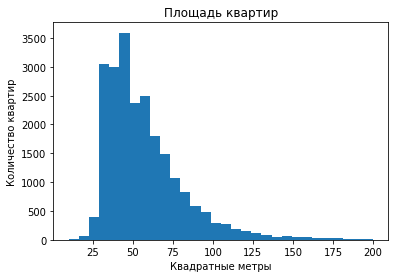

Статистические данные по общей площади 

count    22622.000000
mean        57.029341
std         24.573203
min         13.000000
25%         40.000000
50%         51.000000
75%         67.700000
max        200.000000
Name: total_area, dtype: float64

Наибольшие по площади варианты: 

12055    200.0
3440     200.0
679      200.0
15079    199.2
16656    198.1
Name: total_area, dtype: float64

Наименьшие по площади варианты: 

19642    14.0
19558    13.2
19546    13.0
19807    13.0
17961    13.0
Name: total_area, dtype: float64


In [81]:
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Статистические данные по общей площади','\n')
print(data['total_area'].describe())
print()
print('Наибольшие по площади варианты:','\n')
print(data['total_area'].sort_values(ascending=False).head())
print()
print('Наименьшие по площади варианты:','\n')
print(data['total_area'].sort_values(ascending=False).tail())

**Вывод:**
Основная масса квартир, представленных в датасете, имеет общую площадь от 40 до 67 кв.м. Есть также совсем небольшие квартиры от 12 кв.м, как и квартиры с большой площадью до 200 кв.м, но их количество невелико.

### Жилая площадь

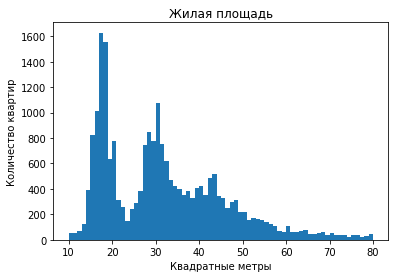

Статистические данные по жилой площади 

count    22622.000000
mean        32.596604
std         16.169005
min          2.000000
25%         18.800000
50%         30.000000
75%         41.163247
max        127.000000
Name: living_area, dtype: float64

Наибольшие по жилой площади варианты: 

10190    127.0
15647    126.6
417      126.6
23448    126.0
15692    125.5
Name: living_area, dtype: float64

Наименьшие по жилой площади варианты: 

21943    5.4
17582    5.0
3242     3.0
13915    2.0
21758    2.0
Name: living_area, dtype: float64


In [82]:
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Статистические данные по жилой площади','\n')
print(data['living_area'].describe())
print()
print('Наибольшие по жилой площади варианты:','\n')
print(data['living_area'].sort_values(ascending=False).head())
print()
print('Наименьшие по жилой площади варианты:','\n')
print(data['living_area'].sort_values(ascending=False).tail())

**Вывод:**
Наибольшее количество квартир имеют жилую площадь от 18 до 41 кв.м Это связано с тем, что в датасете представлено большое количество 1- и 2-х комнатных квартир (таких квартир, в принципе, больше всего на рынке жилья). Вместе с тем, попадаются квартиры с жилой площадью 2-3 кв.м. Скорее всего, это относится к случайным ошибкам ввода данных продавцами. Пики на графике могут быть вызваны граничащими значениями между одно- и двух- комнатными квартирами, двух- и трех- комнатными. А также могут быть связаны с большим количеством типовых проектов домов

### Площадь кухни

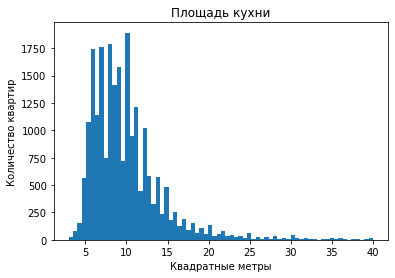

Статистические данные по площади кухни 

count    22622.000000
mean        10.037931
std          4.632062
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         44.900000
Name: kitchen_area, dtype: float64

Наибольшие по площади кухни варианты: 

5861     44.9
18641    44.7
12526    44.7
13661    44.0
15510    44.0
Name: kitchen_area, dtype: float64

Наименьшие по площади кухни варианты: 

11033    2.0
9138     2.0
21419    2.0
19642    2.0
20217    1.3
Name: kitchen_area, dtype: float64


In [83]:
plt.hist(data['kitchen_area'], bins=70, range=(3,40))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Статистические данные по площади кухни','\n')
print(data['kitchen_area'].describe())
print()
print('Наибольшие по площади кухни варианты:','\n')
print(data['kitchen_area'].sort_values(ascending=False).head())
print()
print('Наименьшие по площади кухни варианты:','\n')
print(data['kitchen_area'].sort_values(ascending=False).tail())

**Вывод:**
Данные по размерам кухни отражают общую картину с характеристиками квартир, представленных в датасете. Наибольшее количество значений находится в диапазоне от 7 до 11,5 кв.м. И присутствуют квартиры с мизерными значениями 1,3 - 2 кв.м.. Максимальный размер кухни составляет почти 50 кв.м

### Стоимость квартир

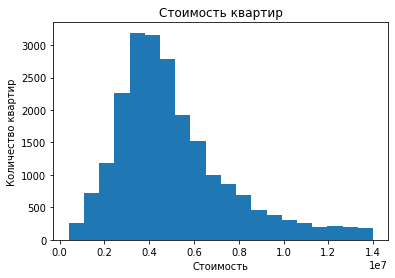

Статистические данные по стоимости 

count    2.262200e+04
mean     5.600026e+06
std      3.779693e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.575000e+06
75%      6.500000e+06
max      2.999900e+07
Name: last_price, dtype: float64

Наибольшие по цене варианты: 

3680     29999000
6922     29999000
11530    29999000
11151    29990000
19773    29900000
Name: last_price, dtype: int64

Наименьшие по цене варианты: 

17676    450000
16219    450000
16274    440000
14911    430000
17456    430000
Name: last_price, dtype: int64


In [84]:
plt.hist(data['last_price'], bins=20, range=(400000,14000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Статистические данные по стоимости','\n')
print(data['last_price'].describe())
print()
print('Наибольшие по цене варианты:','\n')
print(data['last_price'].sort_values(ascending=False).head())
print()
print('Наименьшие по цене варианты:','\n')
print(data['last_price'].sort_values(ascending=False).tail())

**Вывод:**
Из представленных в датасете квартир, половина находится в диапазоне от 3,4 до 6,5 млн.руб. Поскольку на этапе предобработки данных мы отсекли часть квартир с наиболее низкими и высокими ценами, нижний порог цен для оставшихся вариантов составляет 430 тыс.руб за квартиру,а высший - около 30 млн. руб.

### Количество комнат

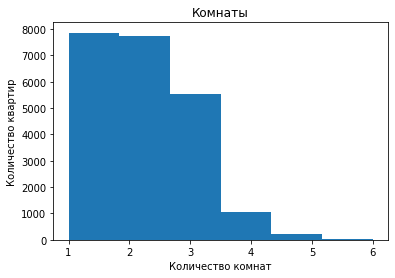

Статистические данные по комнатам 

count    22622.000000
mean         2.013261
std          0.966345
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

Наибольшие по числу комнат варианты: 

14649    6
52       6
17281    6
2017     6
17534    6
Name: rooms, dtype: int64

Наименьшие по числу комнат варианты: 

11157    0
9586     0
10273    0
17695    0
22416    0
Name: rooms, dtype: int64


In [85]:
plt.hist(data['rooms'], bins=6, range=(1,6))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Статистические данные по комнатам','\n')
print(data['rooms'].describe())
print()
print('Наибольшие по числу комнат варианты:','\n')
print(data['rooms'].sort_values(ascending=False).head())
print()
print('Наименьшие по числу комнат варианты:','\n')
print(data['rooms'].sort_values(ascending=False).tail())

**Вывод:**
Половина представленных квартир имеет от 1 до 3 комнат. Среднее и медианное значения почти одинаковы и равнются 2 комнатам. Верхний порог мы установили на уровне 6 комнат, потому что выше этого было очень мало квартир. Также в датасете имеются квартиры, в которых нет комнат. Можно предположить, что это квартиры со свободной планировкой.

### Высота потолков

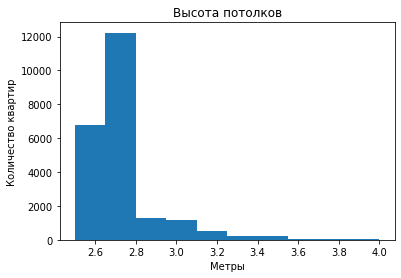

Статистические данные по высоте потолков 

count    22622.000000
mean         2.684648
std          0.187361
min          2.250000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64

Наибольшие по высоте потолков варианты: 

1977     3.98
16466    3.95
15119    3.95
4917     3.95
2676     3.95
Name: ceiling_height, dtype: float64

Наименьшие по высоте потолков варианты: 

5498     2.30
23498    2.30
1582     2.30
20507    2.26
17794    2.25
Name: ceiling_height, dtype: float64


In [86]:
plt.hist(data['ceiling_height'], bins=10, range=(2.5, 4))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Статистические данные по высоте потолков','\n')
print(data['ceiling_height'].describe())
print()             
print('Наибольшие по высоте потолков варианты:','\n')
print(data['ceiling_height'].sort_values(ascending=False).head())
print()
print('Наименьшие по высоте потолков варианты:','\n')
print(data['ceiling_height'].sort_values(ascending=False).tail())

**Вывод:**
Основная часть квартир имеет высоту потолков от 2.6 до 2.7 м. Поскольку на этапе предобработки данных мы отсекли часть квартир с наиболее низкими и высокими потолками, нижний порог потолков для оставшихся вариантов составляет 2.25 м,а высший - 3.98 м. 

### Количество этажей в доме

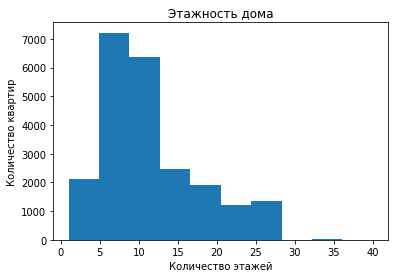

Статистические данные по количеству этажей 

count    22622.000000
mean        10.725135
std          6.573598
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

Наибольшие по количеству этажей варианты: 

5807     36
9370     35
4855     35
21599    35
15982    35
Name: floors_total, dtype: int64

Наименьшие по количеству этажей варианты: 

21603    1
9752     1
22855    1
18900    1
22841    1
Name: floors_total, dtype: int64


In [87]:
plt.hist(data['floors_total'], bins=10, range=(1,40))
plt.title('Этажность дома')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()
print('Статистические данные по количеству этажей','\n')
print(data['floors_total'].describe())
print()
print('Наибольшие по количеству этажей варианты:','\n')
print(data['floors_total'].sort_values(ascending=False).head())
print()
print('Наименьшие по количеству этажей варианты:','\n')
print(data['floors_total'].sort_values(ascending=False).tail())

**Вывод:**
Данные по этажности домов выглядят реалистично. Основная масса домов имеет от 5 до 16 этажей. Медиана на уровне 9 этажей. Максимальная высота дома - 36 этажей.

### Этаж

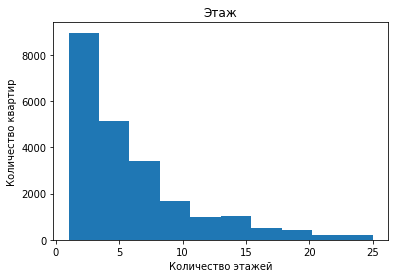

Статистические данные по этажам 

count    22622.000000
mean         5.876757
std          4.849872
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         26.000000
Name: floor, dtype: float64

Количество квартир на 1 этаже: 2823 


Количество одноэтажных домов: 24 


Количество квартир а последнем этаже: 3130 



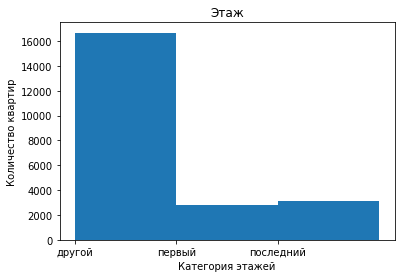

In [88]:
plt.hist(data['floor'], bins=10, range=(1,25))
plt.title('Этаж')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()
print('Статистические данные по этажам','\n')
print(data['floor'].describe())
print()
print(
    'Количество квартир на 1 этаже:', round(data[data['floor_type'] == 'первый']
    .floor_type.count()), '\n'
)
print()
print(
    'Количество одноэтажных домов:', round(data[data['floors_total'] == 1]
    .floors_total.count()), '\n'
)
print()
print(
    'Количество квартир а последнем этаже:', round(data[data['floor_type'] == 'последний']
    .floor_type.count()), '\n'
)
plt.hist(data['floor_type'], bins=3, range=(0,3))
plt.title('Этаж')
plt.xlabel('Категория этажей')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**
В основном в продаже находятся квартиры, расположенные со 2 по 8 этаж. Из всех квартир в датасете 2823 расположены на 1 этаже, в это число входят одноэтажные дома, которых здесь 24. На последнем этаже продается 3130 квартир.

### Расстояние до аэропорта

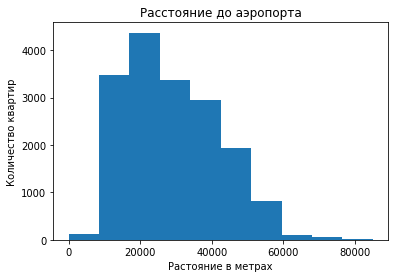

Статистические данные по расстоянию до аэропорта 

count    17226.000000
mean     28877.737025
std      12761.838186
min       6450.000000
25%      18418.500000
50%      26947.000000
75%      37433.000000
max      84853.000000
Name: airports_nearest, dtype: float64

Дальше всех от аэропорта варианты: 

5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
18884    81607.0
Name: airports_nearest, dtype: float64

Ближе всех до аэропорта варианты: 

5062     6989.0
23150    6949.0
7778     6914.0
4017     6450.0
12899    6450.0
Name: airports_nearest, dtype: float64


In [89]:
plt.hist(data.query('airports_nearest != -1')['airports_nearest'], bins=10, range=(0,85000) )
plt.title('Расстояние до аэропорта')
plt.xlabel('Растояние в метрах')
plt.ylabel('Количество квартир')
plt.show()
print('Статистические данные по расстоянию до аэропорта','\n')
print(data[data['airports_nearest'] != -1].airports_nearest.describe())
print()
print('Дальше всех от аэропорта варианты:','\n')
print(data[data['airports_nearest'] != -1].airports_nearest.sort_values(ascending=False).head())
print()
print('Ближе всех до аэропорта варианты:','\n')
print(data[data['airports_nearest'] != -1].airports_nearest.sort_values(ascending=False).tail())

**Вывод:**
Поскольку в датасете была часть объектов с пропущенными значениями в этом столбце, то мы исследуем только часть с известными данными. В этой выборке основная масса квартир находится от аэропорта на расстоянии от 18 до 37 км. Самое близкое расстояние составляет 6.5 км, а дальше всего находятся квартиры - на 85 км

### Расстояние до центра города

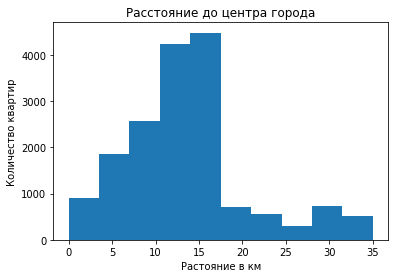

Статистические данные по расстоянию до центра 

count    17187.000000
mean        13.999709
std          8.543462
min          1.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         65.000000
Name: distance_to_center, dtype: float64

Дальше всех от центра варианты: 

5340     65
577      65
20746    65
5218     64
2974     62
Name: distance_to_center, dtype: int64

Ближе всех до центра варианты: 

3887     1
16545    1
9916     1
1978     1
11636    1
Name: distance_to_center, dtype: int64


In [90]:
plt.hist(data.query('distance_to_center > 0')['distance_to_center'], bins=10, range=(0,35))
plt.title('Расстояние до центра города')
plt.xlabel('Растояние в км')
plt.ylabel('Количество квартир')
plt.show()
print('Статистические данные по расстоянию до центра','\n')
print(data.query('distance_to_center > 0').distance_to_center.describe())
print()
print('Дальше всех от центра варианты:','\n')
print(data.query('distance_to_center > 0').distance_to_center.sort_values(ascending=False).head())
print()
print('Ближе всех до центра варианты:','\n')
print(data.query('distance_to_center > 0').distance_to_center.sort_values(ascending=False).tail())

**Вывод:**
Поскольку в датасете была часть объектов с пропущенными значениями в этом столбце, то мы исследуем только часть с известными данными. В этой выборке основная масса квартир находится от центра города на расстоянии от 10 до 16 км. Самое близкое расстояние составляет 208 м, а дальше всего находятся квартиры - на 66 км. Медианное значение - 14 км

### Расстояние до ближайшего парка

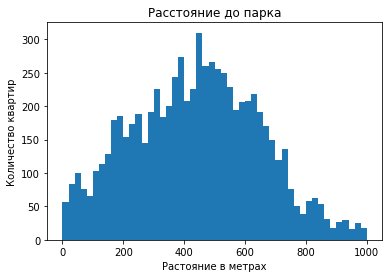

Статистические данные по расстоянию до парка 

count    7522.000000
mean      493.658468
std       340.624794
min         1.000000
25%       290.000000
50%       456.000000
75%       615.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Дальше всех от парка варианты:, 

19430    3190.0
10959    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
Name: parks_nearest, dtype: float64

Ближе всех до парка варианты: 

2527     9.0
9344     7.0
22941    4.0
11949    3.0
14624    1.0
Name: parks_nearest, dtype: float64


In [91]:
plt.hist(data.query('parks_nearest != -1')['parks_nearest'], bins=50, range=(0,1000) )
plt.title('Расстояние до парка')
plt.xlabel('Растояние в метрах')
plt.ylabel('Количество квартир')
plt.show()
print('Статистические данные по расстоянию до парка','\n')
print(data[data['parks_nearest'] != -1].parks_nearest.describe())
print()
print('Дальше всех от парка варианты:,','\n')
print(data[data['parks_nearest'] != -1].parks_nearest.sort_values(ascending=False).head())
print()
print('Ближе всех до парка варианты:','\n')
print(data[data['parks_nearest'] != -1].parks_nearest.sort_values(ascending=False).tail())

**Вывод:**
Поскольку в датасете была часть объектов с пропущенными значениями в этом столбце, то мы исследуем только часть с известными данными. В этой выборке основная масса квартир находится от парка на расстоянии от 300 до 600 м. Вместе с тем, есть значения, которые вызвывают подозрения. Это слишком маленькое расстояние, например 1м, либо слишком большое, такое как 3 км. Скорее всего здесь мы имеем дело с ошибками в картографических данных. 

### День размещения объявления

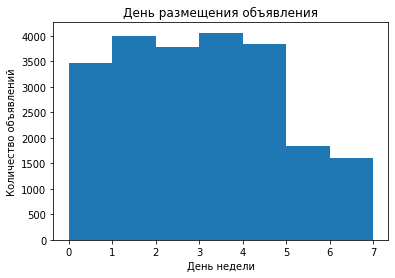

Дни недели размещения объявлений: 

3    4065
1    4001
4    3846
2    3786
0    3467
5    1845
6    1612
Name: day_of_week, dtype: int64


In [92]:
plt.hist(data['day_of_week'], bins=7, range=(0,7))
plt.title('День размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.show()
print('Дни недели размещения объявлений:','\n')
print(data['day_of_week'].value_counts())

**Вывод:**
По данным из датасета больше всего объявлений было размещено в четверг, а меньше всего в воскресенье. В основном наблюдается тенденция размещать объявления в будние дни. В выходные количество размещенных объявлений резко падает. Возможно это связано с риэлторами, которые размещают объявления в рабочие дни.

### Месяц размещения объявления

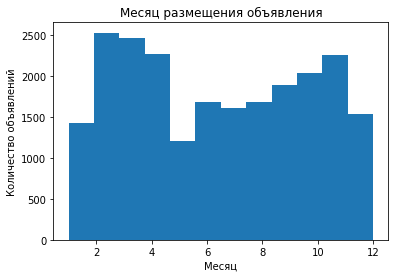

Месяц размещения объявлений: 

2     2532
3     2462
4     2277
11    2262
10    2041
9     1895
6     1684
8     1679
7     1612
12    1541
1     1432
5     1205
Name: month_exposition, dtype: int64


In [93]:
plt.hist(data['month_exposition'], bins=12, range=(1,12))
plt.title('Месяц размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.show()
print('Месяц размещения объявлений:','\n')
print(data['month_exposition'].value_counts())

**Вывод:**
Наблюдается два пика в размещении объявлений: один в период с февраля по апрель, другой - с сентября по ноябрь. Самая низкая активность в мае и январе. Скорее всего, это связано с периодом отпусков

### Сроки продажи квартир

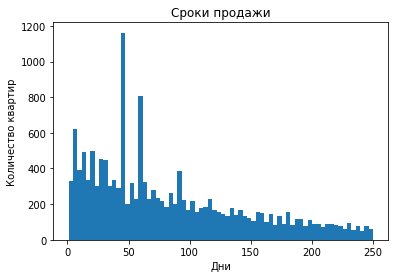

Сроки продажи (медиана): 93 

Сроки продажи (среднее): 171 

Пики продаж: 

45    868
60    529
7     224
30    205
90    178
Name: days_exposition, dtype: int64

Статистические данные: 

count    19616.000000
mean       170.727060
std        196.762364
min          1.000000
25%         44.000000
50%         93.000000
75%        223.000000
max       1099.000000
Name: days_exposition, dtype: float64


In [94]:
plt.hist(data.query('days_exposition != -1')['days_exposition'], bins=70, range=(1,250))
plt.title('Сроки продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
print(
    'Сроки продажи (медиана):', 
    round(data.query('days_exposition != -1')['days_exposition'].median()),'\n'
)
print(
    'Сроки продажи (среднее):',
    round(data.query('days_exposition != -1')['days_exposition'].mean()),'\n'
)
print('Пики продаж:','\n')
print(
    data.query('days_exposition != -1')['days_exposition']
    .value_counts()
    .sort_values(ascending=False)
    .head()
)
print()
print('Статистические данные:','\n')
print(data.query('days_exposition != -1')['days_exposition'].describe())

Сделаем анализ сроков продажи без пиковых значений. Для этого используем новую переменную

In [95]:
new_days_exposition = data[(data['days_exposition'] != -1) &
                           (data['days_exposition'] != 7) &
                           (data['days_exposition'] != 30) &
                           (data['days_exposition'] != 45) &
                           (data['days_exposition'] != 60) &
                           (data['days_exposition'] != 90)] 

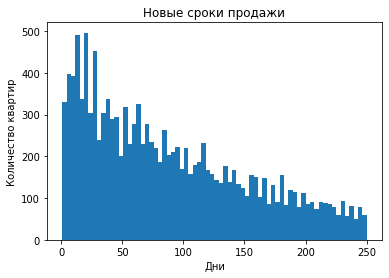

Новые сроки продажи (медиана): 112 

Новые сроки продажи (среднее): 185 


Статистические данные: 

count    17612.000000
mean       184.785601
std        202.826432
min          1.000000
25%         44.000000
50%        112.000000
75%        248.250000
max       1099.000000
Name: days_exposition, dtype: float64


In [96]:
plt.hist(new_days_exposition['days_exposition'], bins=70, range=(1,250))
plt.title('Новые сроки продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
print(
    'Новые сроки продажи (медиана):', 
    round(new_days_exposition['days_exposition'].median()),'\n'
)
print(
    'Новые сроки продажи (среднее):',
    round(new_days_exposition['days_exposition'].mean()),'\n'
)
print()
print('Статистические данные:','\n')
print(new_days_exposition['days_exposition'].describe())

**Вывод:**
На гистограмме видны пики продаж на 7,30,45,60,90 дни после размещения объявления. Скорее всего, в эти дни заканчивался срок платного размещения объявления и оно снималось с продажи. Возможно, в эти дни объявления снимаются с продажи, если продавец не подтверждает его актуальность. В любом случае, такие данные искажают статистику реальных продаж, поэтому мы будем полагаться на очищенные данные.
Из очищенных данных видно, что большая часть квартир была продана в течение 1,5 - 8 месяцев. В среднем срок продажи составляет 185 дней, медианное значение - 112 дней. Случались продажи в течение суток после размещения объявления, также были варианты когда квартира продавалась более 3 лет. Быстрыми можно считать продажи менее 44 дней, а долгими - более 248 дней.


### Определение факторов, влияющих на стоимость квартир

- Определим влияние общей площади на стоимость квартир

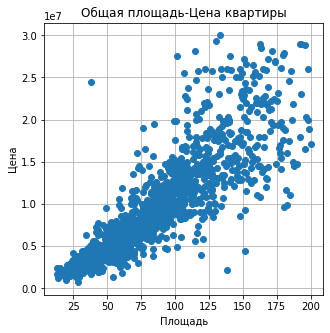

Корреляция цены и площади: 0.78


In [97]:
( 
    data.pivot_table(index='total_area', values='last_price')
          .plot(grid=True,
          style='o',
          figsize=(5, 5),
          title='Общая площадь-Цена квартиры', 
          xlabel='Площадь',
          ylabel='Цена',
          legend=False)
)
plt.show()
print('Корреляция цены и площади:', data['total_area'].corr(data['last_price']).round(2))

**Вывод:**
Существует высокая зависимость стоимости квартиры от ее площади. Зависимость прямая: чем больше площадь квартиры,  тем выше ее стоимость.

- Определим влияние жилой площади на стоимость квартиры

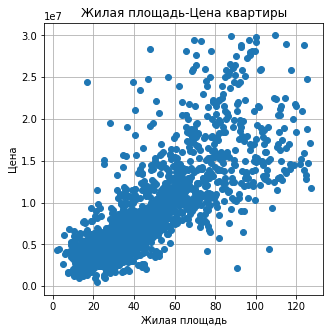

Корреляция цены и жилой площади: 0.67


In [98]:
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True,
          style='o',
          figsize=(5, 5),
          title='Жилая площадь-Цена квартиры', 
          xlabel='Жилая площадь',
          ylabel='Цена',
          legend=False)
)
plt.show()
print('Корреляция цены и жилой площади:', data['living_area'].corr(data['last_price']).round(2))

**Вывод:**
Существует высокая зависимость стоимости квартиры от ее жилой площади, хотя она несколько меньше, чем от общей плащади квартиры. Зависимость прямая: чем больше жилая площадь квартиры,  тем выше ее стоимость.

- Определим влияние площади кухни на стоимость квартиры

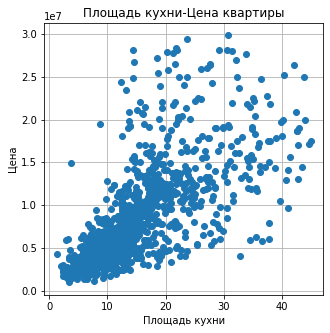

Корреляция цены и площади кухни: 0.62


In [99]:
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True,
          style='o',
          figsize=(5, 5),
          title='Площадь кухни-Цена квартиры', 
          xlabel='Площадь кухни',
          ylabel='Цена',
          legend=False)
)
plt.show()
print('Корреляция цены и площади кухни:', data['kitchen_area'].corr(data['last_price']).round(2))

**Вывод:**
Существует высокая зависимость стоимости квартиры от ее площади кухни, хотя она несколько меньше, чем от жилой плащади и общей площади квартиры. Зависимость прямая: чем больше жилая площадь квартиры,  тем выше ее стоимость.

- Изучим влияние количества комнат на стоимость квартиры

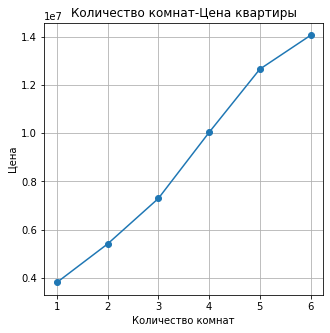

Корреляция цены и числа комнат: 0.49


In [100]:
(
    data.query('rooms > 0')
    .pivot_table(index='rooms', values='last_price')
    .plot(grid=True,
          style='o-',
          figsize=(5, 5),
          title='Количество комнат-Цена квартиры', 
          xlabel='Количество комнат',
          ylabel='Цена',
          legend=False)
)
plt.show()
print('Корреляция цены и числа комнат:', data['rooms'].corr(data['last_price']).round(2))

**Вывод:**
Существует высокая зависимость стоимости квартиры от количества комнат. Зависимость прямая: чем больше комнат,  тем выше ее стоимость квартиры. Однако, количество комнат меньше влияет на стоимость квартиры, чем ее площадь. Очевидно, что в большой квартире может быть много маленьких комнат или мало, но больших по размеру. Поэтому, покупатель больше ориентируется на площадь самой квартиры, чем на количество комнат в ней

- Изучим влияние этажа, на котором расположена квартира, на ее стоимость. 

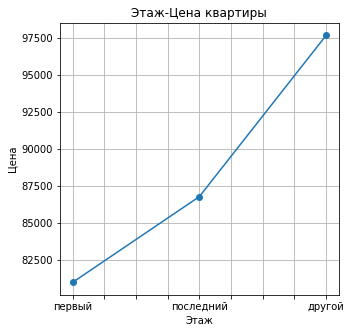

In [101]:
(
    data.pivot_table(index='floor_type', values='meter_price', aggfunc='median')
    .sort_values(by='meter_price')
    .plot(grid=True,
          style='o-',
          figsize=(5, 5),
          title='Этаж-Цена квартиры', 
          xlabel='Этаж',
          ylabel='Цена',
          legend=False)
)
plt.show()

**Вывод:**
Существует зависимость стоимости квадратного метра от этажа, на котором находится квартира. Дешевле квартиры на первом этаже, дороже - на последнем и самые дорогие - на всех этажах, кроме первого и последнего

- Изучим влияние даты размещения объявления на стоимость квартиры

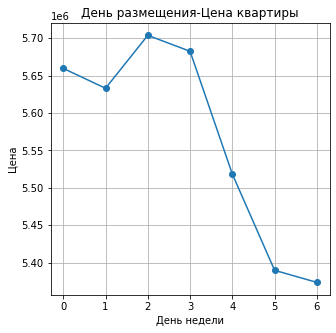

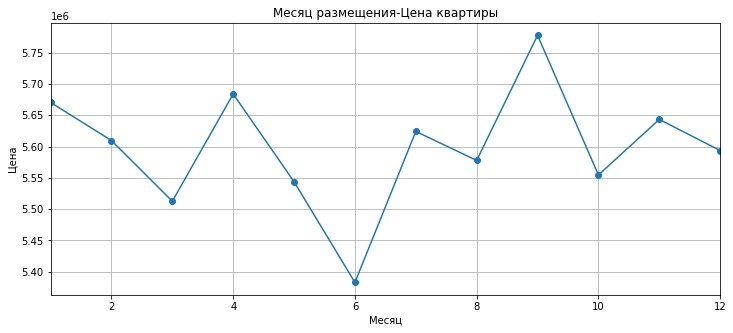

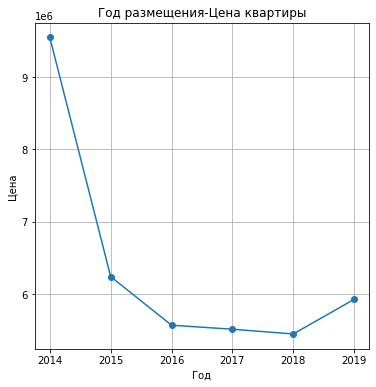

In [102]:
(
    data.pivot_table(index='day_of_week', values='last_price')
    .plot(grid=True,
          style='o-',
          figsize=(5, 5),
          title='День размещения-Цена квартиры', 
          xlabel='День недели',
          ylabel='Цена',
          legend=False)
)
plt.show()

(
    data.pivot_table(index='month_exposition', values='last_price')
    .plot(grid=True,
          style='o-',
          xlim=(1,12),
          figsize=(12, 5),
          title='Месяц размещения-Цена квартиры', 
          xlabel='Месяц',
          ylabel='Цена',
          legend=False)
)
plt.show()

(
    data.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True,
          style='o-',
          figsize=(6, 6),
          title='Год размещения-Цена квартиры', 
          xlabel='Год',
          ylabel='Цена',
          legend=False)
)
plt.show()

**Вывод:**
- Видна зависимость стоимости квартиры от дня недели. В будние дни стоимость выше, к выходным падает. Возможно, это связано с тем, что в выходные дни публикуют объявления, в основном, прямые продавцы. В то время как в будни, начинают работать риелторские компании. У риелторов стоимость выше за счет комиссии.
- По месяцам отчетливо видно, что цена квартир падает к июню, а в сентябре имеет самый высокий пик. Здесь, очевидно, это связано с периодом отпусков. Летом из-за отпусков спрос на квартиры падает и приходится снижать цену, чтобы быстрее продать квартиру. А в сентябре ситуация меняется на противоположную.
- Сравнивая стоимость квартир по годам размещения, наблюдаем снижение уровня цен с 2014г по 2018г, а затем, в 2019г, рынок начинает движение вверх. Связано это  с кризисом в экономике, пик которого как раз приходился на этот период. 

### Сравнение цены квадратного метра в ТОП 10 населенных пунктах

In [103]:
data = data.rename(columns={
    'locality_name':'Город',
    'meter_price':'Цена кв.м',
    'distance_to_center':'Расстояние до центра'
})

top_locality = data['Город'].value_counts().head(10)

top_locality_price = (data.query('Город in (@top_locality.index)')
.pivot_table(values='Цена кв.м', index='Город')
.astype(int)
)

top_locality_price.sort_values('Цена кв.м', ascending=False)

,Цена кв.м
Город,
Санкт-Петербург,110253
Пушкин,102978
деревня Кудрово,92235
поселок Парголово,90170
поселок Мурино,85459
поселок Шушары,78504
Колпино,75366
Гатчина,68685
Всеволожск,68564


**Вывод:**
Из списка ТОП-10 городов с самым большим количеством объявлений, первенство по стоимости кв.метра жилья принадлежит Санкт_Петербургу - 110253 руб., замыкает ТОП город Выборг с ценой кв.метра 58416 руб

### Расчет стоимости километра в Санкт-Петербурге

In [104]:
sp_locality = data[(data['Город'] == 'Санкт-Петербург') & (data['Расстояние до центра'] > 0)]

pivot_table_sp = (sp_locality.pivot_table(
    index='Расстояние до центра',
    values='Цена кв.м', aggfunc='mean')
    . astype(int)              
)
pivot_table_sp

,Цена кв.м
Расстояние до центра,
1,138196
2,121309
3,118739
4,130758
5,131750
6,131915
7,128121
8,118466
9,109908


В таблице виден пик по стоимости на расстоянии 27 км от центра, он вызван тем, что в таблице имеется квартира, которая имеет аномальную стоимость. Ее желательно исключить из анализа.

In [105]:
sp_locality[sp_locality['Расстояние до центра'] == 27]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,Город,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,Цена кв.м,day_of_week,month_exposition,year_exposition,floor_type,Расстояние до центра
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,False,False,25.0,0,Санкт-Петербург,23888.0,27313.0,1.0,1496.0,0.0,-1.0,128,193918,1,11,2017,другой,27
5961,6,2250000,32.0,2018-02-27,1,2.65,2,16.5,2,False,False,False,7.0,0,Санкт-Петербург,24006.0,27431.0,0.0,-1.0,0.0,-1.0,178,70312,1,2,2018,последний,27


In [106]:
sp_locality = sp_locality.drop(index=748)

<AxesSubplot:title={'center':'Стоимость км в СПб'}, xlabel='Расстояние до центра', ylabel='Цена кв.м'>

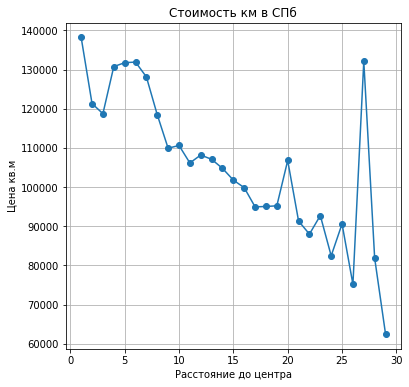

In [107]:
pivot_table_sp.plot(grid=True,
          style='o-',
          figsize=(6, 6),
          title='Стоимость км в СПб', 
          xlabel='Расстояние до центра',
          ylabel='Цена кв.м',
          legend=False)

**Вывод:**
При удалении от центра города стоимость кв.метра падает. Если в самом центре кв.метр стоит 138196 руб, то на окраине города цена падает более, чем в два раза и опускается до 62481 руб.

## Общий вывод

В ходе анализа архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов была проделана работа по предобработке данных, а именно:
 - удалены или заполнены пропущенные значения там, где это было необходимо.Пропуски  в датасете были как случайные (не заполнены продавцом), так и вызваны ошибками в картографических данных (отсутствующие или неверные значения). Аномальные значения связаны с ошибками в заполнении данных продавцами;
 - заменены типы данных на необходимые для удобной работы;
 - удалены аномальные значения;
 - были посчитаны и добавлены в таблицу столбцы с ценой квадратного метра жилья, с днями недели, месяцами и годами размещения объявлений, категориями по этажам квартир;
 - были изучены следующие параметры  - общая площадь квартиры, жилая площадь квартиры, площадь кухни, цена продажи, число комнат, высота потолков, количество этажей в доме и этаж, на котором продается квартира, расстояние до центра города, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления.
 
В ходе исследования выявлено:

 - основная масса квартир, представленных в датасете, имеет общую площадь от 40 до 67 кв.м. Это связано с тем, что большинство представленных квартир имеют одну или две комнаты, что характерно на рынке жилья;
 - стоимость большей части квартир находится в диапазоне от 3,4 до 6,5 млн.руб;
 - средняя высота потолков близка к медианному значению и составляет 2,68м;
 - большая часть домов имеют от 5 до 16 этажей, что также является характерным для региона;
 - поскольку большое количество пропусков было в картографических данных, исправить которые не представлялось возможным, анализ удаленности объектов от аэропорта, центра города, парков и прудов проводился на усеченной выборке. По ее результатам основная часть объектов находилась на расстоянии 18-37 км от аэропорта, 10-16 км от центра города, 300-600 м от ближайшего парка;
 - в основном подаются объявления в будние дни, сезонные пики весной и осенью;
 - средний срок продажи квартиры 185 дней (6 меяцев).
 
По результатам исследования установлены следующие факторы, влияющие на стоимость жилья:

 - Общая площадь квартиры и, как следствие, жилая площадь, размер кухни и количество комнат. Эти показатели имеют самые высокие коэффициенты корреляции. Зависимость прямая - стоимость квартиры растет при увеличении каждого из этих показателей. Однако, количество комнат меньше влияет на стоимость квартиры, чем ее площадь. Очевидно, что в большой квартире может быть много маленьких комнат или мало, но больших по размеру. Поэтому, покупатель больше ориентируется на площадь самой квартиры, чем на количество комнат.
 - Существует зависимость стоимости квадратного метра от этажа, на котором находится квартира. Дешевле квартиры на первом этаже, дороже - на последнем и самые дорогие - на всех этажах, кроме первого и последнего.
 - Видна зависимость стоимости квартиры от дня недели. В будние дни стоимость выше, к выходным падает. Возможно, это связано с тем, что в выходные дни публикуют объявления, в основном, прямые продавцы. В то время как в будни, начинают работать риелторские компании. У риелторов стоимость выше за счет комиссии.
 - По месяцам отчетливо видно, что цена квартир падает к июню, а в сентябре имеет самый высокий пик. Здесь, очевидно, это связано с периодом отпусков. Летом из-за отпусков спрос на квартиры падает и приходится снижать цену, чтобы быстрее продать квартиру. А в сентябре ситуация меняется на противоположную.
 - Сравнивая стоимость квартир по годам размещения, обнаружено снижение уровня цен с 2014г по 2018г, а затем, в 2019г, рынок начинает движение вверх. Связано это  с кризисом в экономике, пик которого как раз приходился на этот период. 
 
Дополнительно были определены 10 городов с наибольшим количеством объявлений. На вершине списка - Cанкт-Петербург, замыкает список - Выборг с показателем вдвое меньше. Также была выявлена зависимость стоимости квадратного метра от расстояяния до центра города. Стоимость квадратного метра в центре города выше в два раза, чем стоимость на окраине города.

Также важно учитывать, что, исследуя стоимость квартир в 2014-2019 годах, мы не делали сегментацию рынка, а лишь смотрели показатели по рынку в целом. То есть, возможно, что цены на аналогичные квартиры в разных годах вели себя абсолютно по-разному. Или рынок элитного жилья, скорее всего, заметно отличается от общей массы. Но эти факторы не были целью нашего анализа.